___
# Atividade: Regressão Linear Simples
___

## Aula 23

**Preparo Prévio:**
1. Montogmery. Seção 6-2 - Simple Linear Regression
1. Magalhães e Lima, seção 9.5. Regressão Linear Simples


Referência: http://www.statsmodels.org/dev/diagnostic.html

Referência: [http://connor-johnson.com/2014/02/18/linear-regression-with-python/](http://connor-johnson.com/2014/02/18/linear-regression-with-python/)

**Hoje:**
1. Entender o conceito de regressão linear

___

## Renda vs CO2

Foram coletados dois dados do site https://www.gapminder.org/:
1. Emissão de CO2 per capita
1. Renda per capita

As linhas representam os países e as colunas representam o ano. 

Como os arquivos estão separados, será preciso juntá-los cruzando o país.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Leitura dos arquivos em Excel
co2 = pd.read_excel('indicator CDIAC carbon_dioxide_emissions_per_capita.xlsx')
income = pd.read_excel('indicator gapminder gdp_per_capita_ppp.xlsx')

In [3]:
#É possível verificar que cada linha representa um país e as colunas representam o ano
co2.head(2)

,CO2 per capita,1751,1755,1762,1763,1764,1765,1766,1767,1768,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022704,0.027472,0.03678,0.04709,0.068312,0.131602,0.213325,0.262174,NaN,NaN


In [4]:
#O mesmo se aplica a renda.
income.head(2)

,GDP per capita,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


___
### Inner Join

Vamos agora juntar as duas tabelas via país, selecionar apenas o ano de 2010 e remover os NaNs.

Ao final vamos fazer o gráfico de dispersão das duas variáveis.

**Sugestão**: pesquise sobre a função DataFrame.join(), pode ser muito útil no futuro.

In [5]:
#Cruza as duas tabelas via país
co2.set_index('CO2 per capita', inplace=True)
income.set_index('GDP per capita', inplace=True)

df = co2.join(income, how='inner', lsuffix='_co2', rsuffix='_income')

#Seleciona o ano de 2010 e remove os NaNs
df = df[['2010_co2','2010_income']].dropna()

#Transforma a renda na escala de milhares de dólares
df['2010_income'] /= 1000


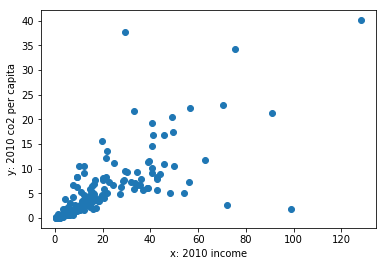

In [6]:
x = df['2010_income']
y = df['2010_co2']
plt.scatter(x,y);
plt.xlabel("x: 2010 income");
plt.ylabel("y: 2010 co2 per capita");

___
### Regressão

Vamos tentar agora ajustar um modelo sobre os dados. A primeira tentativa será ajustar um reta:

$$y_i=\beta_0+\beta_1x_i+\epsilon_i$$


Esse modelo é muito parecido com o visto na aula 06, com algumas mudanças:
1. Agora utilizaremos $\beta_i$ para se referir aos coeficientes.
1. Existe um termo $\epsilon_i$ para representar os resíduos.

O primeiro passo agora é calcular os valores da regressão. Existem diversas formas de estimar os $\beta$s, vamos utilizar o método de **Mínimos Quadrados Ordinários (MQO ou OLS - Ordinary Least Squares em inglês)**. 

$$\hat{\beta}_0=\bar{y}-\hat{\beta}_1\bar{x}$$

$$\hat{\beta}_1=\frac{S_{XY}}{S_{XX}}=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$$

**Obs: Acompanhar e anotar o desenvolvimento no quadro.**
___

### Tarefa 1 - $\hat{\beta}_1$ e  $\hat{\beta}_0$

Calcule os valores de $\bar{x}$ e $\bar{y}$. Calcule também $S_{XX}$ e $S_{XY}$, em seguida calcule o $\hat{\beta}_1$ e o $\hat{\beta}_0$

In [7]:
#B0 e B1

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))


beta0: 0.6557309117836843
beta1: 0.24326849086184094


### Verificando os resultados da regressão



Vamos contrastar os resultados previstos pela regressão com os dados.

In [8]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

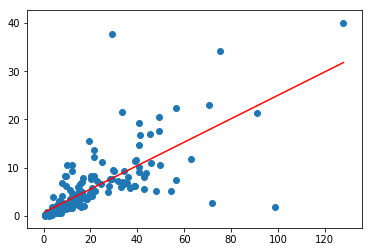

In [9]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y) # dados

### Tarefa 2 - Resíduos 

Agora calcular o vetor de resíduos, dado por:
$$\epsilon_i=y_i-(\hat{\beta}_0+\hat{\beta}_1x_i)$$

**Verifique a normalidade dos resíduos. Parece uma Normal?**

In [15]:
 # Escreva sua fórmula dos resíduos aqui

 # Verifique graficamente  se é uma normal - como fazer isso? Lembre-se do probplot

### Teste de hipóteses para os coeficientes 

Agora que já aprendemos Teste de Hipóteses, podemos verificar se os Betas são realmente relevantes. para tal vamos testar:

$$H_0: \beta_i=0$$
$$H_1: \beta_i\neq0$$



 Verifique o **valor-p** para os betas e verifique se rejeitamos ou não $H_0$. Utilize $\alpha=5\%$. Verifique os resultados da regressão
 
 Responda depois da seção abaixo

___
### Usando statsmodels.OLS

Agora que estão familiarizados com algumas medidas, Rode a função OLS() da biblioteca statsmodel e interprete:

In [11]:
import numpy as np
import statsmodels.api as sm


xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               2010_co2   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     235.2
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           9.80e-35
Time:                        12:47:39   Log-Likelihood:                -534.72
No. Observations:                 186   AIC:                             1073.
Df Residuals:                     184   BIC:                             1080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.6557      0.423      1.551      0.123      -0.178       1.490
2010_income     0.2433      0.016     15.337      0.000       0.212       0.275
==============================================================================
Omnibus:                      100.299   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2384.399
Skew:                           1.435   Prob(JB):                         0.00
Kurtosis:                      20.304   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot da reta ajustada

**Tarefa 3**

Usando os resultados da equação obtida via `statsmodels`, plote novamente a reta ajustada sobre os pontos

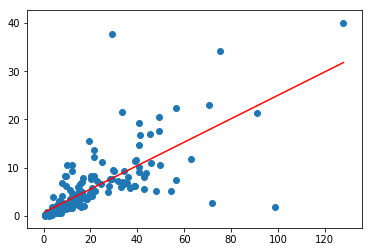

In [12]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);

### Resíduos

Plot da normalidade dos resíduos. O mesmo plot dos resíduos que foi feito acima pode ser facilitado se usarmos o atributo `resid` dos resultados da regressão

___



**Tarefa 4**: Você consegue interpretar alguns dos resultados acima? Você acha que os resíduos formam uma normal? Fale um pouco sobre a homocedasticidade do modelo.

In [16]:
# Descomente para funcionar
#stats.probplot(results.resid, dist="norm", plot=plt);

## Resumo dos testes da regressão


Os resumo dos resultados da regressão traz informações que nos permitem avaliar a qualidade do ajuste e a validade de:

* Normalidade dos resíduos
* Testes de hipóteses dos resíduos

### Coeficiente de determinação $R^2$

É uma medida de quão bem uma regressão capta a variação presente nos dados. 


$$ R^2 = 1 - \frac{SS_E}{SS_T}$$


Para calcular esta fórmula precisamos das relações:

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$


$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$





### p-values da estatística t

Existem para cada coeficiente $\beta_i$

Testam a seguinte hipótese:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Um *p-value* baixo permite **rejeitar** a hipótese $H_0$ que $\beta_i = 0$




### $R^2$ ajustado

$N$ é o número de dados
$P$ é o número de preditores

$Rajustado^2 = R^2 - (1-R^2)\frac{P}{N-P-1}$

Penaliza preditores que não acrescentam poder preditivo significativo

### Estatística F

Testa as seguintes hipóteses:

$H_0: \beta_i = 0$, para todo $i > 0$

$H_1: \beta_i \neq 0$, para algum $i > 0$


Ou seja: compara o modelo obtido versus um modelo só com intercepto

### Teste Omnibus

Testa a normalidade dos resíduos

Se $Pr(Omnibus)$ for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente

### Teste Jarque-Bera

Outro teste de normalidade.

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal


### Teste Durbin-Watson

Testa autocorrelação dos resíduos.

Varia na faixa $[0, 4]$

* Um valor próximo de $2$ sugere que não há autocorrelação dos resíduos
* Um valor menor que $2$ sugere **correlação positiva** dois resíduos
* Um valor maior que $2$ sugere **correlação negativa** dois resíduos





### Tarefa 5 - Análise dos valores p

O que os valores *p* da regressão dizem a respeito dos *betas?*

**R.:**

### Tarefa 6 - Análise da estatística F

O que o valor da estatística F diz sobre a qualidade da regressão? 

Diga qual hipótese nula e alternativa $Prob(F)$ avalia

**R.:**

### Tarefa 7 - Análise do $R^2$

O que o valor de $R^2$ obtido diz sobre o poder explicativo da regressão obtida via OLS?

**R.:**

### Tarefa 8 - Análise de normalidade do resíduo

O que os testes *Omnibus* e *Jarque-Bera* dizem a respeito da normalidade do resíduo? 

**R.:**

### Tarefa 9 - Análise de homocedasticidade

Verifique visualmente se a hipótese de homocedasticidade é válida.